In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

In [3]:
# Load and Explore the Dataset
# Load the dataset
cancer = load_breast_cancer()

# Convert to Pandas DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add target labels
df['target'] = cancer.target

# Display basic info
print(df.head())
print(df.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

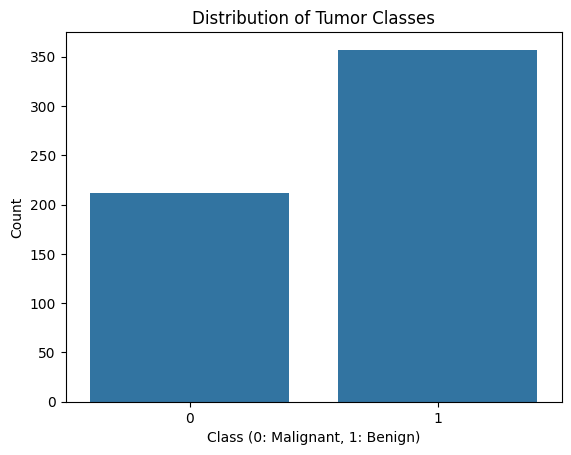

In [4]:
# Data Visualization

# Check Class Distribution

sns.countplot(x=df['target'])
plt.title("Distribution of Tumor Classes")
plt.xlabel("Class (0: Malignant, 1: Benign)")
plt.ylabel("Count")
plt.show()

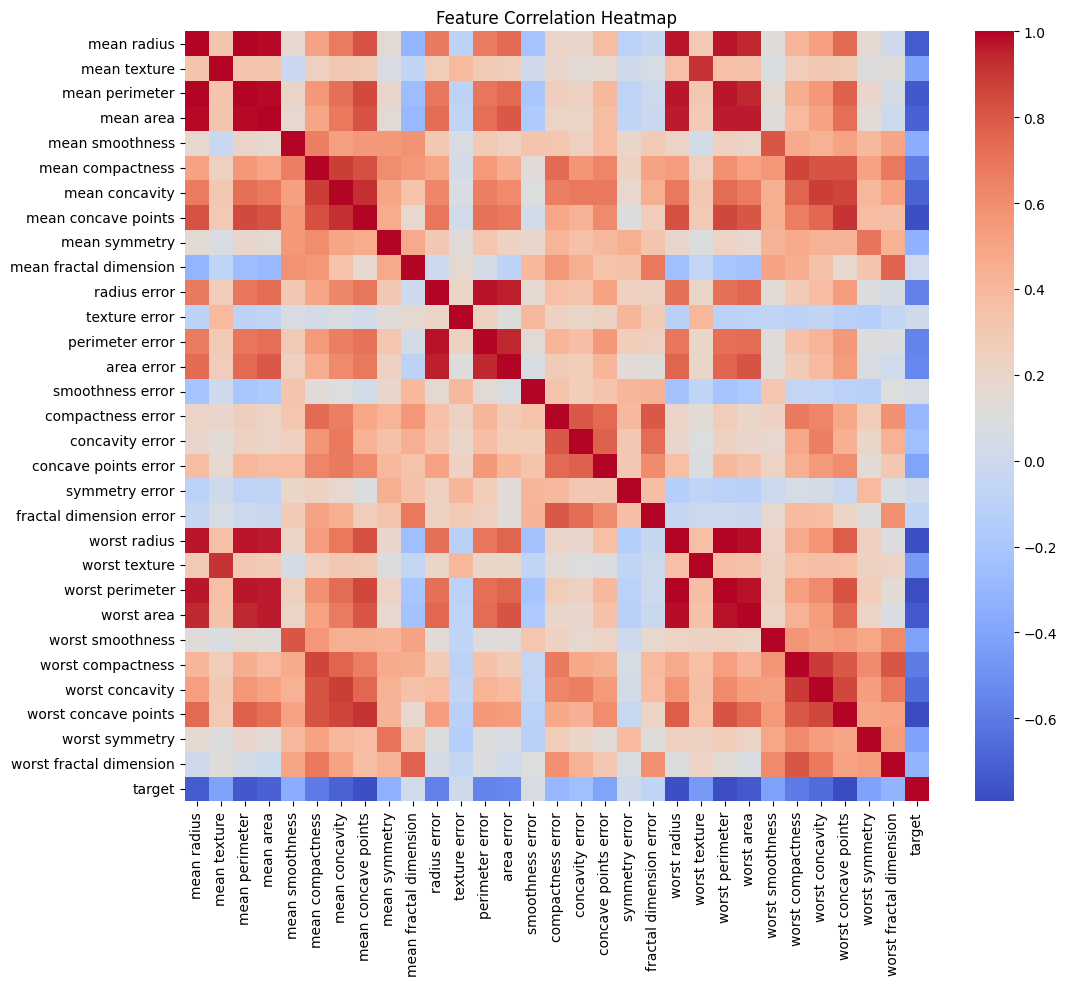

In [5]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Preprocessing the Data

# Split features and target
X = df.drop(columns=['target'])
y = df['target']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train the KNN Model

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Choose k=5 (can be tuned)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Predict on test data
y_pred = knn.predict(X_test)

Model Accuracy: 0.95


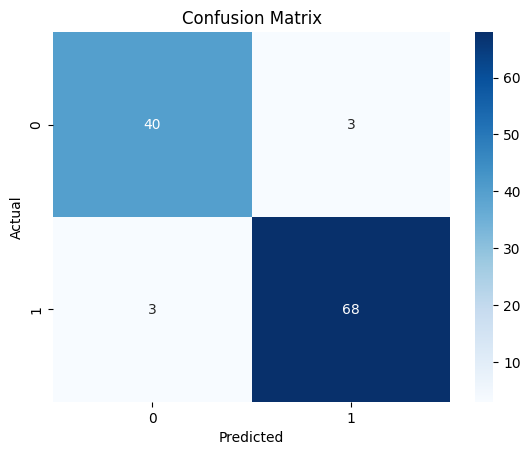

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [9]:
# Evaluate the Model

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

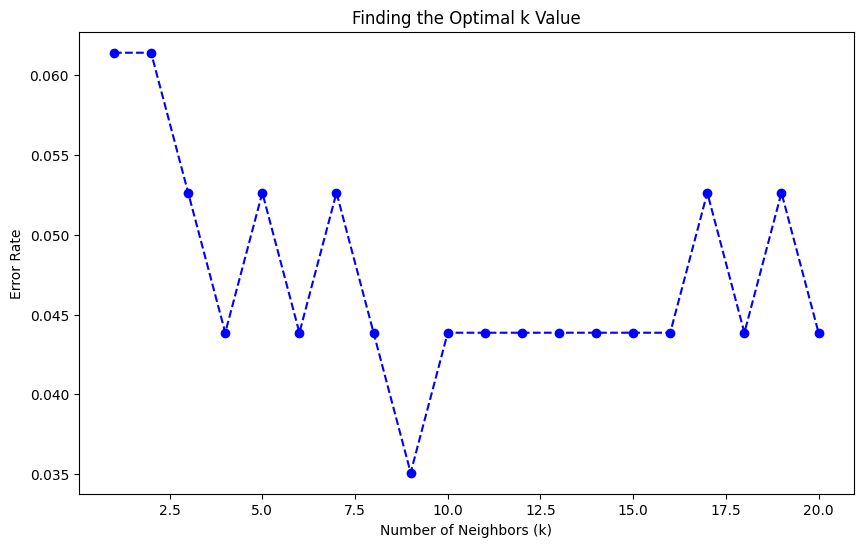

In [10]:
# Optimize k Value
error_rates = []
for k in range(1, 21):  # Test k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(np.mean(y_pred_k != y_test))

# Plot error rate vs. k value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Finding the Optimal k Value")
plt.show()